In [13]:
from tensorflow import keras
from keras.optimizers import Adam
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
#Load dataset
#x_train: NumPy array of grayscale image data with written digits (60000, 28, 28)
#y_train: NumPy array of digit labels (0-9) (60000,)
#x_test: NumPy array of grayscale image data with written digits (10000, 28, 28)
#y_test: NumPy array of digit labels (0-9) (10000,)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
#Convert 2D array of training labels to 1D array
y_train = y_train.reshape(-1,)

In [5]:
#Convert 2D array of testing labels to 1D array
y_test = y_test.reshape(-1,)

In [6]:
#Normalize x_train and x_test to improve accuracy
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#Build convolutional neural network for identifying handwritten digits
#Batch normalization and dropout is used for handling overfitting
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(layers.BatchNormalization())

cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Dropout(0.25))

cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Dropout(0.35))

cnn.add(layers.Conv2D(128, (3,3), activation='relu'))
cnn.add(layers.BatchNormalization())

cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))

cnn.add(layers.BatchNormalization())
cnn.add(layers.Dropout(0.45))

cnn.add(layers.Dense(10, activation='softmax'))

#Compile the model using appropriate parameters
cnn.compile(optimizer=Adam(learning_rate=0.0008),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

#Fit the model and test validation accuracy and validation loss to see if model is well-generalized
history = cnn.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.9261 - loss: 0.2418 - val_accuracy: 0.9851 - val_loss: 0.0459
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9733 - loss: 0.0890 - val_accuracy: 0.9857 - val_loss: 0.0450
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9800 - loss: 0.0685 - val_accuracy: 0.9893 - val_loss: 0.0362
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9825 - loss: 0.0576 - val_accuracy: 0.9913 - val_loss: 0.0284
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9857 - loss: 0.0490 - val_accuracy: 0.9905 - val_loss: 0.0308
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9868 - loss: 0.0452 - val_accuracy: 0.9904 - val_loss: 0.0296
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9879 - loss: 0.0407 - val_accuracy: 0.9931 - val_loss: 0.0231
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9890 -

In [ ]:
#Get current working directory
cwd = os.getcwd()

In [ ]:
#Save trained CNN model
cnn_path = cwd + '\\cnn_digit_detector.keras'
cnn.save(cnn_path)

In [ ]:
#Load CNN model for use
cnn_model = keras.models.load_model('cnn_digit_detector.keras')

In [ ]:
#Get predictions of the CNN model test dataset
y_pred = np.argmax(cnn_model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Text(0.5, 1.0, 'True Label vs. Predicted Label')

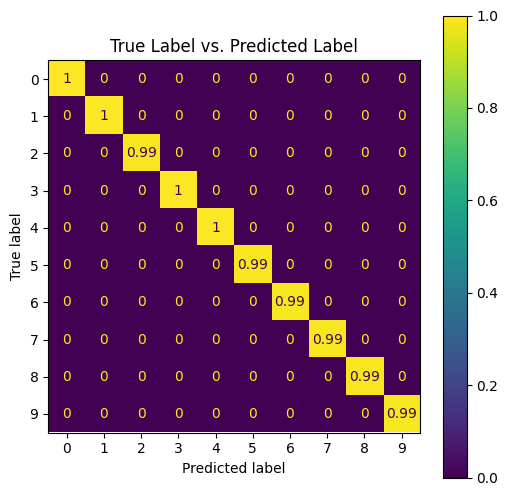

In [ ]:
#Create confusion matrix
cm = np.round(confusion_matrix(y_test, y_pred, normalize='true'), 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(cmap='viridis', ax=ax) #Show confusion matrix with custom color palette
ax.set_title('True Label vs. Predicted Label')

In [ ]:
#Save confusion matrix
fig.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')